# Forumla 1

La Fórmula 1 es una liga deportiva de vehículos que se caracteriza por tener los vehículos mas veloces y de los mejores pilotos de todo el mundo. Para este deporte se integran la alta velocidad, nuevas tecnologías vehiculares, estrategias y habilidades de los pilotos, lo cual lo vuelve un deporte muy profundo e interesante para los espectadores.

El poder realizar predicciones de los resultados de las carreras es realmente interesante porque permite que podamos tener un entendimiento mas profundo de como afectan distintas características a los resultados.

# Importar liberias y datos

In [1]:
%%capture
!pip install spacy
!pip install nltk
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install folium
!pip install xgboost
!pip install pandaserd
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime
import tensorflow as tf
from datetime import datetime
from sklearn.naive_bayes import GaussianNB
from IPython.display import display, IFrame
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix, f1_score, recall_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, Flatten, Concatenate
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

/Users/jorgemagdaleno/PycharmProjects/pythonProject/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Descripción de Archivos CSV

- **circuits.csv**: Catálogo de circuitos.

- **constructor_results.csv**: Posición final del equipo en la carrera.
- **constructor_standings.csv**: Posición final del equipo en el campeonato.
- **constructors.csv**: Catálogo de equipos.

- **driver_standings.csv**: Posición final del piloto en el campeonato.
- **drivers.csv**: Catálogo de pilotos.

- **lap_times.csv**: Tiempos de vuelta en el circuito.
- **pit_stops.csv**: Registro de paradas en los pits.

- **qualifying.csv**: Resultados de clasificación para la carrera.
- **races.csv**: Catálogo de carreras.
- **results.csv**: Posición de cada piloto en la carrera.

- **seasons.csv**: Información de las temporadas.

- **sprint_results.csv**: Resultados de las carreras sprint (100 km en lugar de la distancia estándar).

- **status.csv**: Diccionario de estados.

Se seleccionaran solamente races, drivers, qualifying por ser datos que podemos asegurar tener antes de la carrera
Y tambien se selecciona results para definir nuestra variable que queremos predecir


In [3]:
# Importamos los mas importantes y los analizamos
result_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')
races_df = pd.read_csv('races.csv')
qualified_df = pd.read_csv('qualifying.csv')
pd.get_option("display.max_columns",None)

In [4]:
qualified_df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [5]:
result_df.head() 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [6]:
drivers_df.head() 

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [7]:
races_df.head() 

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


# Analisis y tratado de caracteristicas

Juntamos los data frames en uno solo, ademas creamos otro mas pequeno que usaremos para

In [8]:
df = pd.merge(result_df, races_df, on='raceId', how='left')
df = pd.merge(df, drivers_df, on='driverId', how='left')
df = pd.merge(df, qualified_df, on=['raceId', 'driverId'], how='left')
pd.get_option("display.max_columns",None)

Revisar por nulos

In [9]:
df.isna().sum()

resultId               0
raceId                 0
driverId               0
constructorId_x        0
number_x               0
grid                   0
position_x             0
positionText           0
positionOrder          0
points                 0
laps                   0
time_x                 0
milliseconds           0
fastestLap             0
rank                   0
fastestLapTime         0
fastestLapSpeed        0
statusId               0
year                   0
round                  0
circuitId              0
name                   0
date                   0
time_y                 0
url_x                  0
fp1_date               0
fp1_time               0
fp2_date               0
fp2_time               0
fp3_date               0
fp3_time               0
quali_date             0
quali_time             0
sprint_date            0
sprint_time            0
driverRef              0
number_y               0
code                   0
forename               0
surname                0


Revisar tipo de datos

Revisamos las estadisticas del dataframe

In [11]:
# summary
df.describe()

,resultId,raceId,driverId,constructorId_x,grid,positionOrder,points,laps,statusId,year,round,circuitId,qualifyId,constructorId_y,number,position_y
count,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,10254.000000,10254.000000,10254.000000,10254.000000
mean,13260.940986,546.376560,274.357291,49.801161,11.145820,12.814812,1.959578,46.228251,17.317056,1991.099287,8.420793,23.684943,5141.499415,46.884338,18.526624,11.212112
std,7656.813206,309.642244,279.275606,61.091426,7.213453,7.677869,4.306475,29.577860,26.081700,19.799290,4.992080,18.973790,2976.371659,72.432640,18.243795,6.270548
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,6630.500000,298.000000,57.000000,6.000000,5.000000,6.000000,0.000000,23.000000,1.000000,1977.000000,4.000000,9.000000,2565.250000,4.000000,7.000000,6.000000
50%,13260.000000,527.000000,170.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000,1991.000000,8.000000,18.000000,5129.500000,9.000000,14.000000,11.000000
75%,19889.500000,803.000000,385.000000,60.000000,17.000000,18.000000,2.000000,66.000000,14.000000,2008.000000,12.000000,34.000000,7713.750000,30.000000,22.000000,16.000000
max,26524.000000,1132.000000,860.000000,215.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2024.000000,22.000000,80.000000,10311.000000,215.000000,99.000000,28.000000


Nos deshacemos de variables que no vamos a utilizar, como identificadores repetidos o datos que no podrian ser obtenidos antes de la carrera y no tendria sentido entrenar

In [12]:
df = df.drop(['url_y','url_x','position_x','fastestLapTime','fastestLapSpeed','positionText','driverRef',
              'positionText','points','number_x','number_y','constructorId_y','qualifyId','milliseconds',
              'number','code', 'sprint_time', 'fastestLap', 'rank', 'statusId'
             ],axis=1)

Renombramos variables a algo mas reconocible.

In [13]:
col_name = {'code':'driver_code','position_y':'position', 
            'nationality_x':'nationality','name_y':'company',
            'raceId_x':'racerId'}

df.rename(columns=col_name,inplace=True)

# Convertir tipos de datos


Cambiamos el tipo de dato para calcular los tiempos de clasificacion, edad de los pilotos y rellenar los valores vacios de la posicion de clasificacion.

In [14]:
def time_to_milliseconds(time_str):
    if isinstance(time_str, float) or time_str == '\\N' or pd.isna(time_str):
        return None
    try:
        minutes, seconds = time_str.split(':')
        total_milliseconds = int(minutes) * 60 * 1000 + float(seconds) * 1000
        return total_milliseconds
    except ValueError:
        return None

#Agegar nombre
df['driver_name'] = df['forename']+' '+df['surname']
df = df.drop(['forename','surname'],axis=1)

# Calcular edades y fecha de naciemiento
df['dob'] = pd.to_datetime(df['dob'])
dates = datetime.today()-df['dob']
age = dates.dt.days/365
df['age'] = round(age)
df = df.drop(columns=['dob'])

df['position'] = df.apply(lambda row: row['grid'] if pd.isna(row['position']) else row['position'], axis=1)
df = df.drop(columns=['grid'])
# cambiar formato y consolidar los mejores tiempos de cada quien
df['q1'] = df['q1'].apply(time_to_milliseconds)
df['q2'] = df['q2'].apply(time_to_milliseconds)
df['q3'] = df['q3'].apply(time_to_milliseconds)
df['q1'] = df[['q1', 'q2', 'q3']].max(axis=1)
df = df.drop(columns=['q2', 'q3'])

Clasificamos los datos como categoricos o numericos

In [15]:
cat = []
num = []
for i in df.columns:
    
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,26519.0,13260.940986,7656.813206,1.0,6630.50,13260.0,19889.5,26524.0
raceId,26519.0,546.376560,309.642244,1.0,298.00,527.0,803.0,1132.0
driverId,26519.0,274.357291,279.275606,1.0,57.00,170.0,385.0,860.0
constructorId_x,26519.0,49.801161,61.091426,1.0,6.00,25.0,60.0,215.0
positionOrder,26519.0,12.814812,7.677869,1.0,6.00,12.0,18.0,39.0
laps,26519.0,46.228251,29.577860,0.0,23.00,53.0,66.0,200.0
year,26519.0,1991.099287,19.799290,1950.0,1977.00,1991.0,2008.0,2024.0
round,26519.0,8.420793,4.992080,1.0,4.00,8.0,12.0,22.0
circuitId,26519.0,23.684943,18.973790,1.0,9.00,18.0,34.0,80.0
position,26519.0,11.202082,7.203338,0.0,5.00,11.0,17.0,34.0


# Limpieza de Outliers

Usaremos el metodo de cuartiles para limpiar los outliers del dataset

In [17]:
id_columns = ['time_x', 'resultId', 'racerId', 'driverId', 'constructorId', 'driverStandingsId']

# Creamos una lista que no quieremos aplicar el metodo debido 
# a que estos realmente no necesitan ser correjidos
num = df.select_dtypes(include='number').columns
non_id_columns = num.difference(id_columns)

Q1 = df[non_id_columns].quantile(0.25)
Q3 = df[non_id_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos
mask = ~((df[non_id_columns] < (Q1 - 1.5 * IQR)) | (df[non_id_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to the entire DataFrame to maintain consistent indexing
df_filtered = df[mask]

# Drop any remaining NaN rows
df_filtered = df_filtered.dropna()
df=df_filtered


# Sesgo

Revisando el sesgo en los datos. El sesgo se utiliza para verificar la normalidad de los datos, variando entre -1 y 1.  
* **-1** --> Sesgo a la izquierda  
* **0** --> Distribución normal  
* **1** --> Sesgo a la derecha  

En este caso no es muy extremo  asi que se puede mantener.

In [18]:
df[num].skew()

resultId          -0.108920
raceId             0.049723
driverId           0.794063
constructorId_x    2.735044
positionOrder      0.210230
laps              -1.269107
year              -0.262754
round              0.152934
circuitId          2.162179
position           0.172987
q1                 0.457254
age                0.161958
dtype: float64

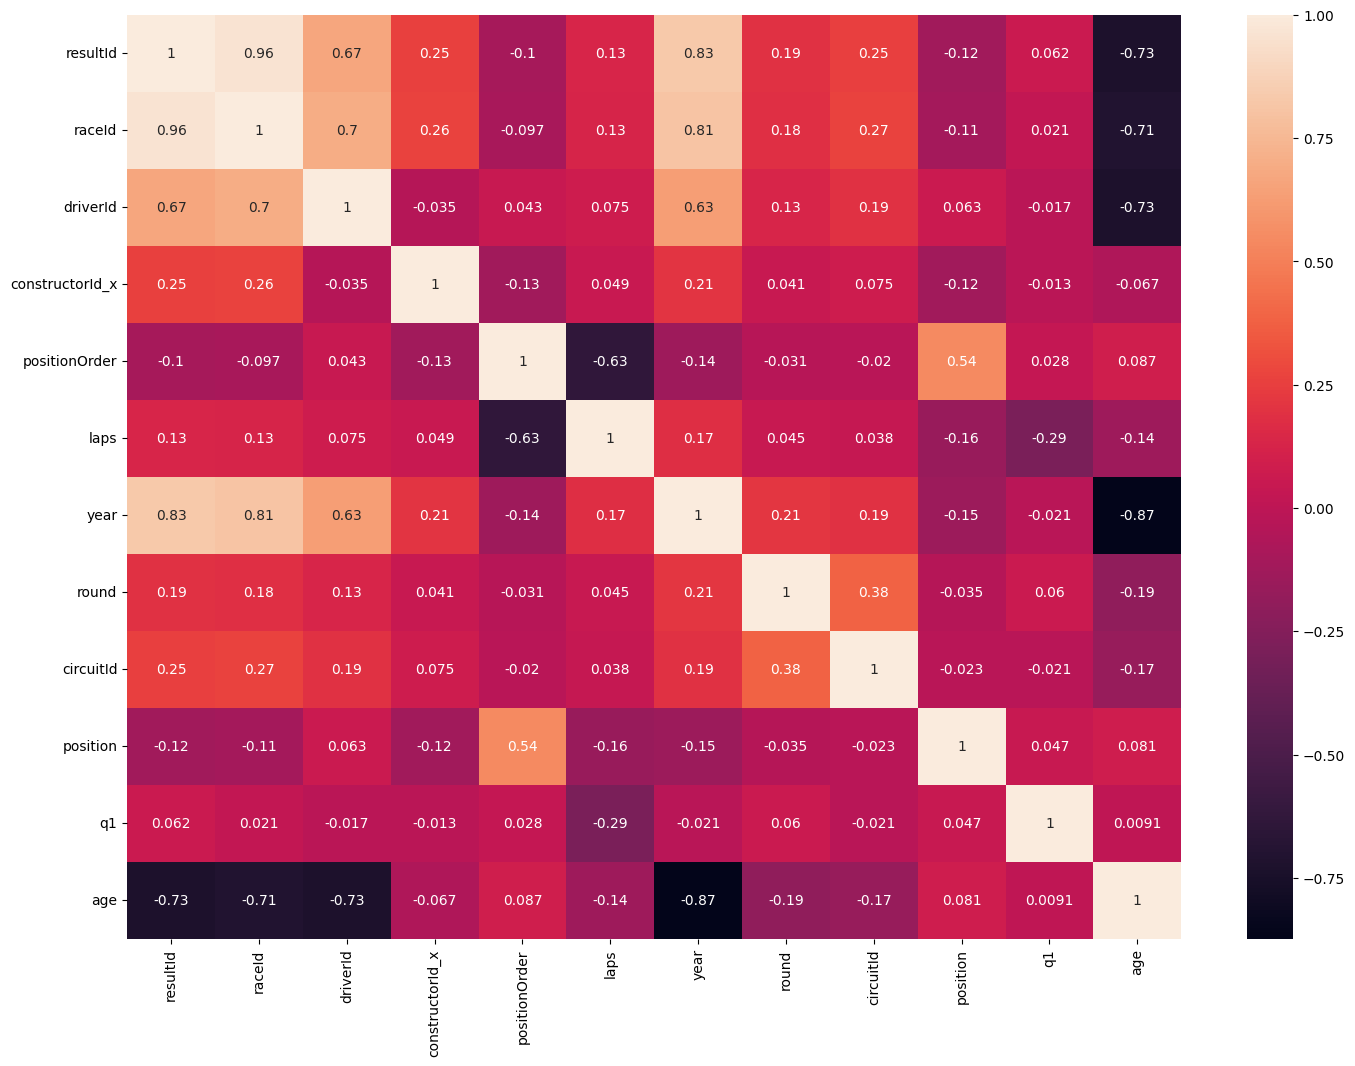

In [19]:
# heatmap

plt.figure(figsize=(17,12))
sns.heatmap(df[num].corr(),annot=True)
plt.show()

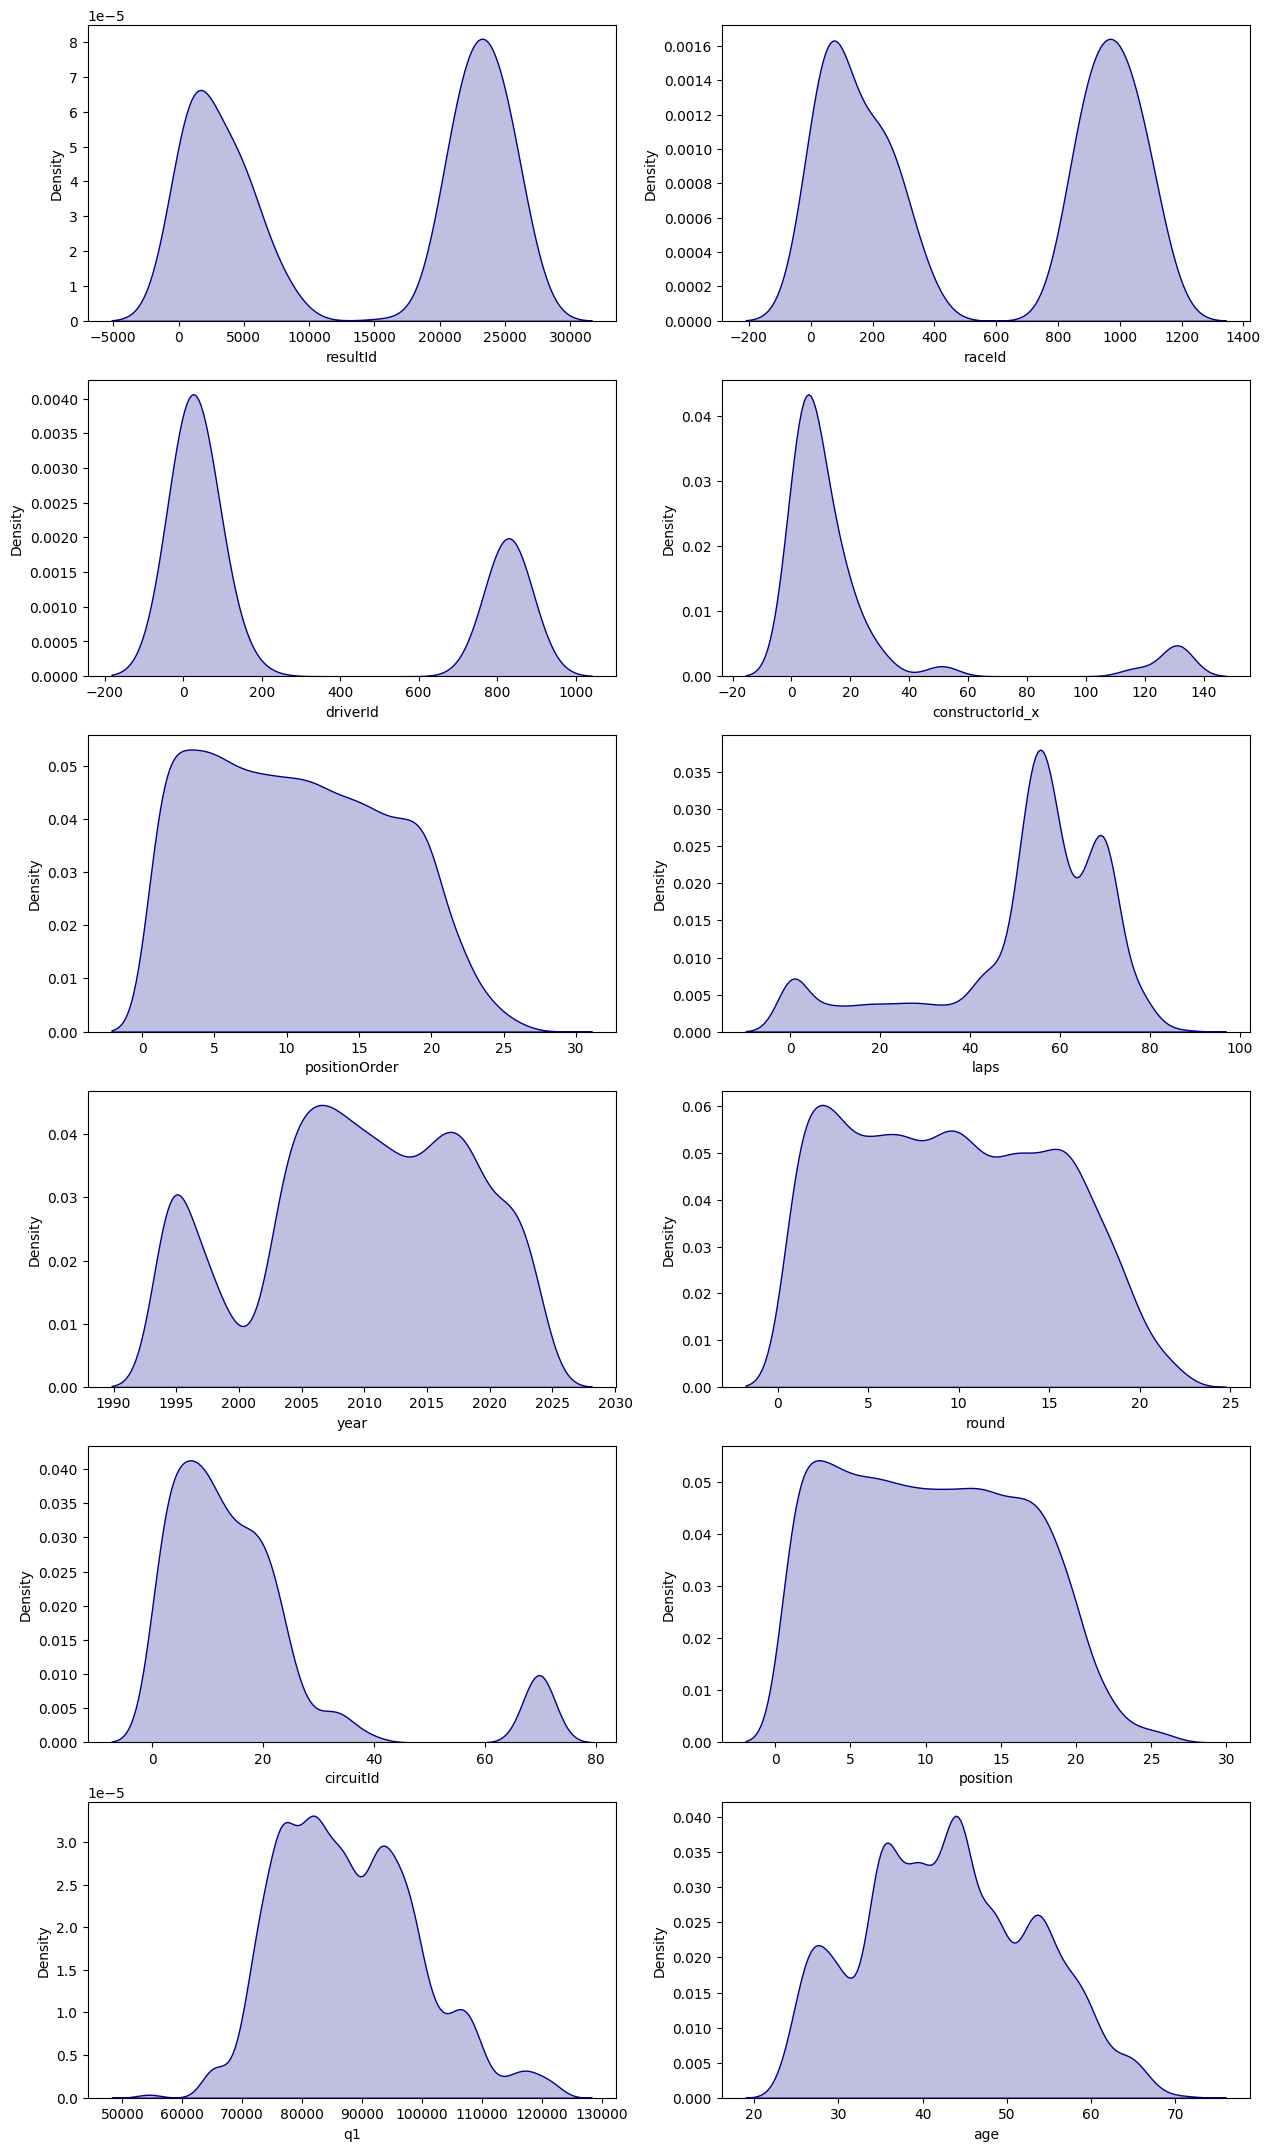

In [20]:

plt.figure(figsize=(15,50)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

# Encoding

Por medio de label encodign podemos hacer que las variables categoricas se vuelvan variables numericas.

Luego para otro tipo de categoricas podemos usar get_dummies para expandir una caracteristica a muchas

In [21]:
le = LabelEncoder()

In [22]:
# encoding categorical columns
for i in cat:
    df[i] = le.fit_transform(df[i])

In [23]:
x = df.drop(columns=[
    'positionOrder',
    'resultId',
    'raceId'
])
x = pd.get_dummies(x, columns=['constructorId_x', 'nationality', 'circuitId','driverId'], drop_first=True)
y = df.positionOrder

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

# Algoritmos

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [26]:
clf = DecisionTreeClassifier(max_depth=5,random_state=1234)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1234)

# Arbol de decision

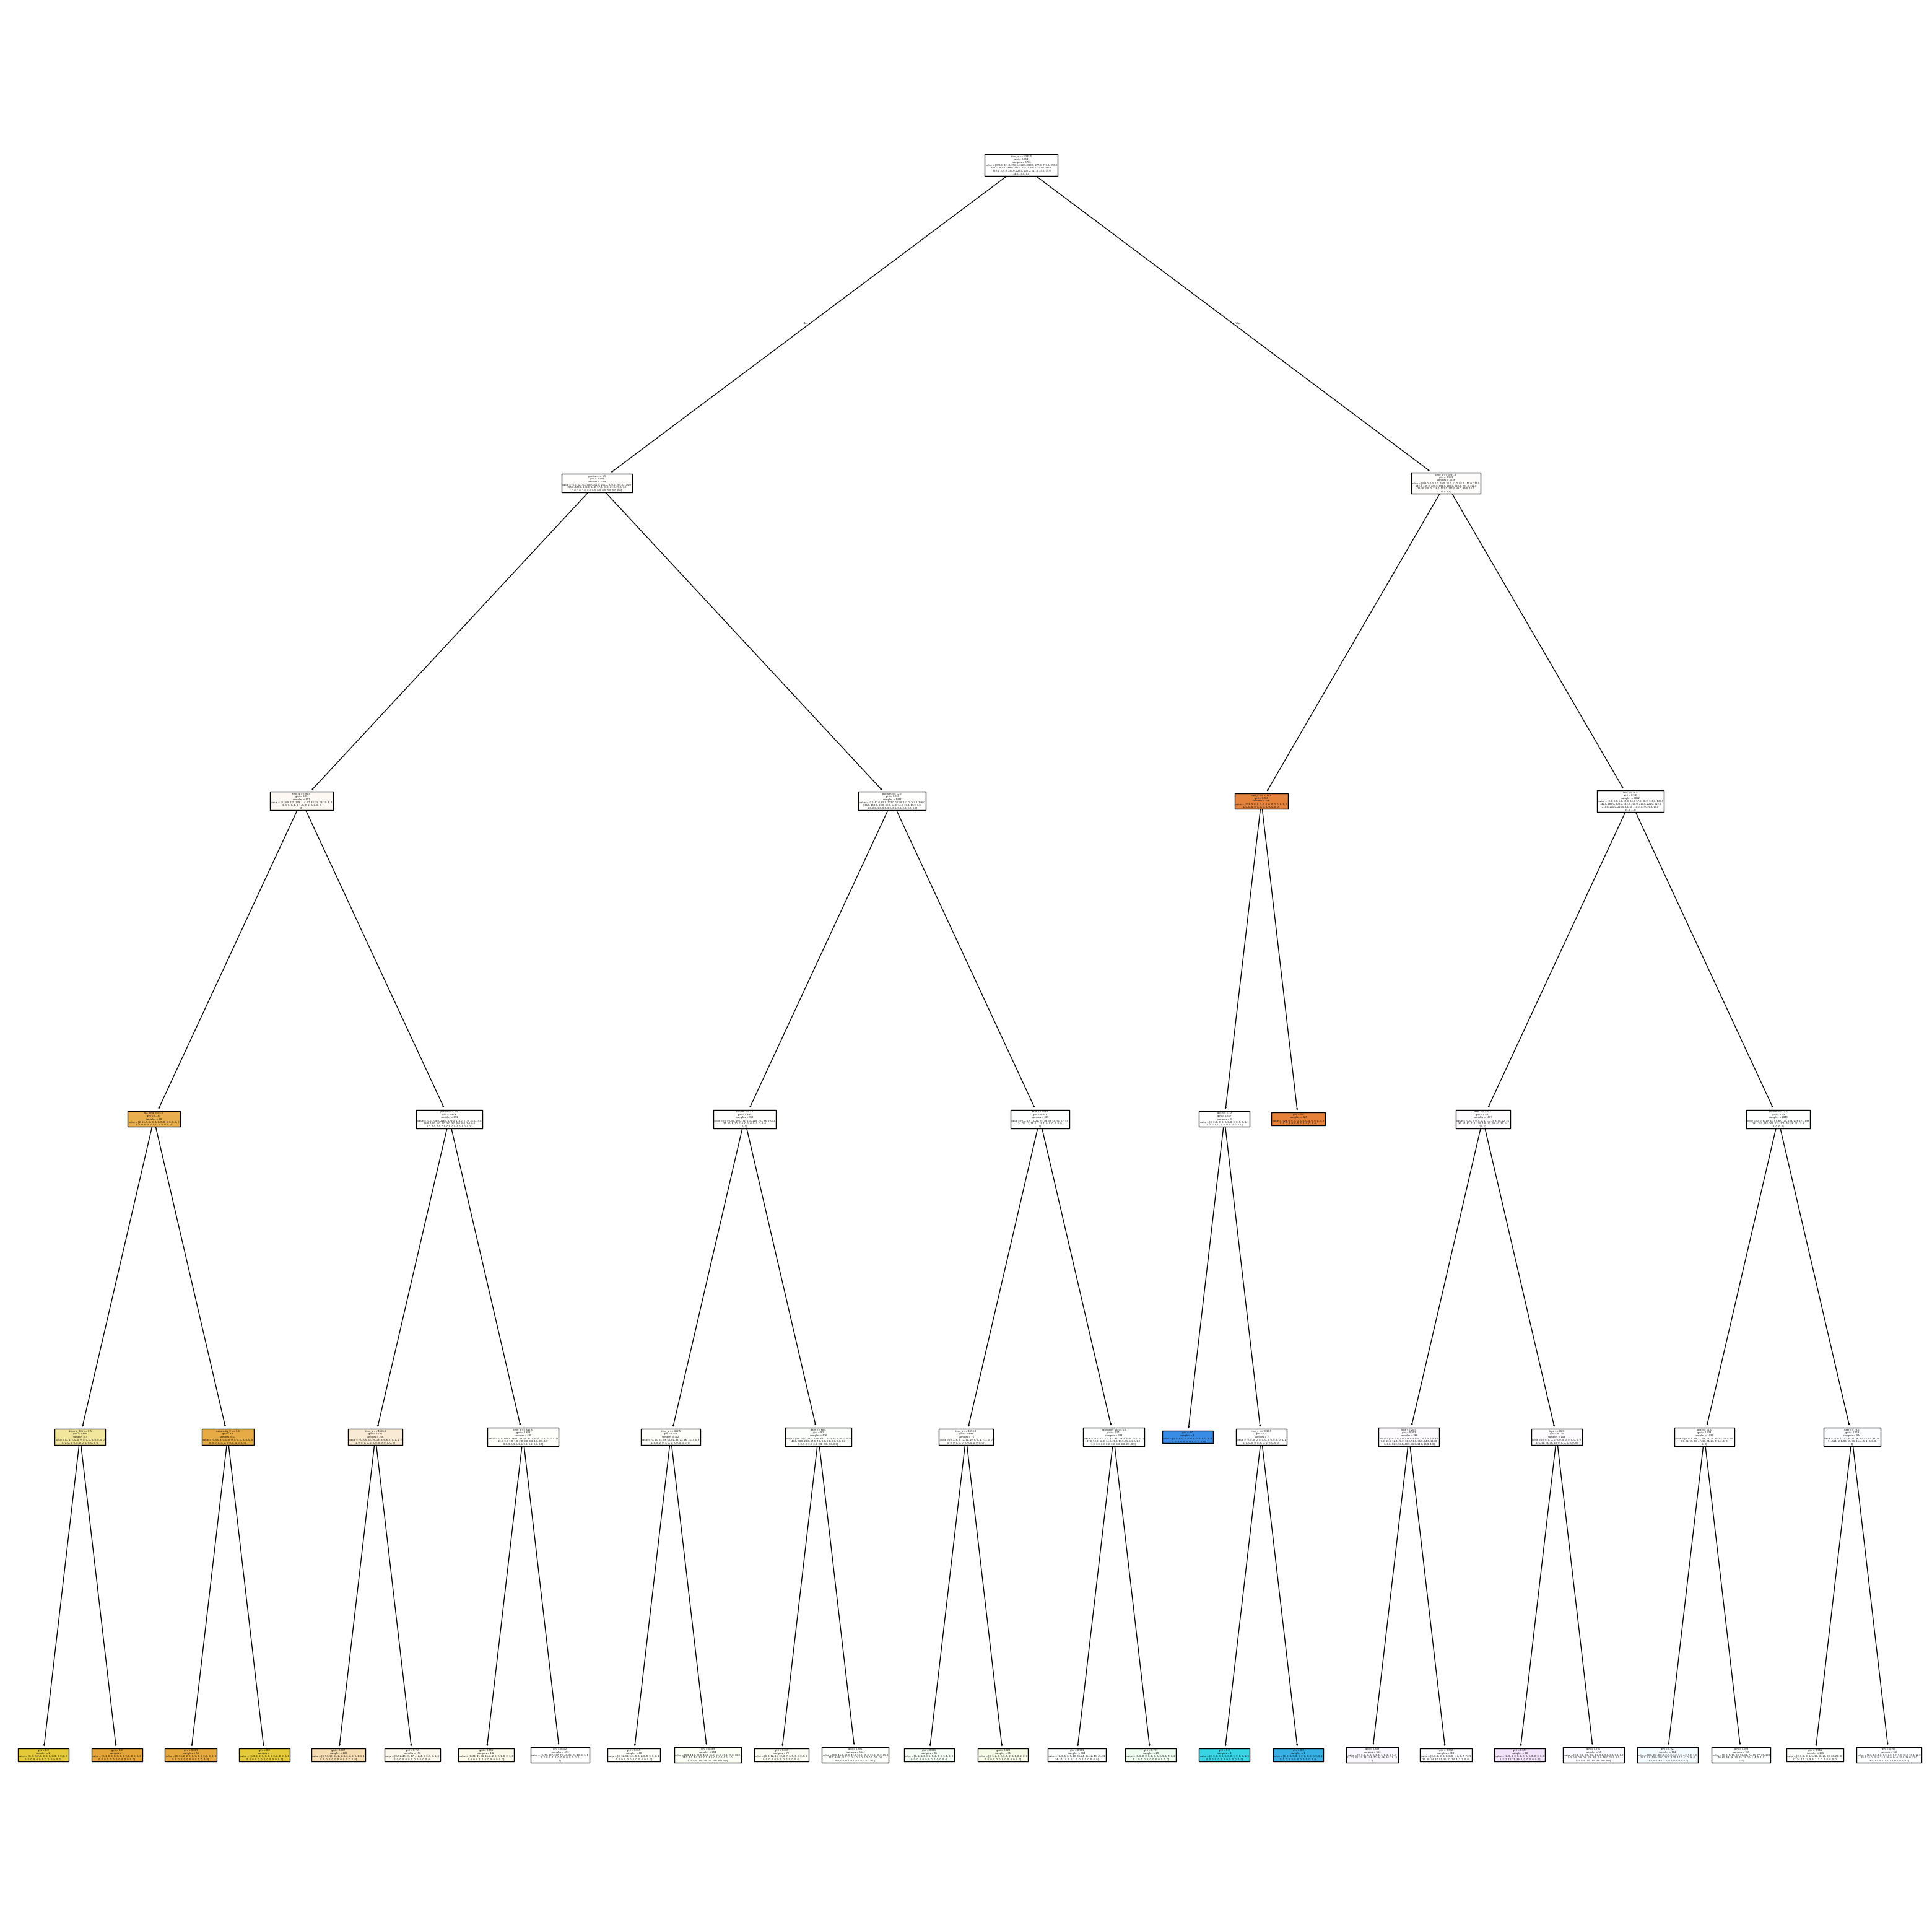

In [27]:
fn = list(x.columns)
fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf,
               feature_names=fn,
               filled=True)

Creamos unas funciones para no repetir mucho codigo despues

In [28]:
def grafica(dic):
    plt.figure(figsize=(15, 7.5))
    plt.title("Desviacion absoluta promedio de algorimos", fontweight='bold')
    plt.xlabel("Algoritmos")
    plt.ylabel("Desviacion absoluta promedio")

    # Plotting the data
    plt.plot(dic.keys(), dic.values(), marker='o', color='mediumpurple', linewidth=4, markersize=13,
             markerfacecolor='gold', markeredgecolor='black')

    # Annotating the points
    for x, y in zip(dic.keys(), dic.values()):
        label = "{:.2f}".format(y)
        plt.annotate(label, (x, y), textcoords="offset points", xytext=(-3.75, 10), ha='right')

    # Rotate x-axis labels to avoid overlap
    plt.xticks(rotation=45)

    # Show plot
    plt.show()

In [29]:
def trainingModels(x_train,x_test):
    d = {}
    li = [lr, sgd, rn_clf, knn_clf, gb, dt_clf, ridge, dt_reg, rn_reg, knn_reg, svr, xgb_reg]
    models = {}
    for i in li:
        i.fit(x_train,ytrain)
        ypred = i.predict(x_test)
        mae = mean_absolute_error(ytest, ypred)
        model_name = i.__class__.__name__.split('(')[0]
        print(model_name, ":", mae)
        d.update({model_name: mae})
        models.update({model_name: i})
    return d, models

# Modelos

Genero todos los modelos y los corro con diferentes procesamiento de datos

In [30]:

# Classification ML algorithms
lr = LogisticRegression(solver='sag')
dt_clf = DecisionTreeClassifier()
rn_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Regression ML algorithms
lin_reg = LinearRegression()
ridge = Ridge()
dt_reg = DecisionTreeRegressor()
rn_reg = RandomForestRegressor()
knn_reg = KNeighborsRegressor()
svr = SVR()
xgb_reg = XGBRegressor()

In [31]:
m1, models1 = trainingModels(xtrain,xtest)

LogisticRegression : 8.926375404530745
SGDClassifier : 5.195388349514563
RandomForestClassifier : 2.5186084142394822
KNeighborsClassifier : 4.8450647249190935
GaussianNB : 4.925566343042071
DecisionTreeClassifier : 2.4081715210355985
Ridge : 2.666464770667426
DecisionTreeRegressor : 2.22168284789644
RandomForestRegressor : 1.7125525889967639
KNeighborsRegressor : 3.585194174757281
SVR : 5.009914176921231
XGBRegressor : 1.7125116114460932


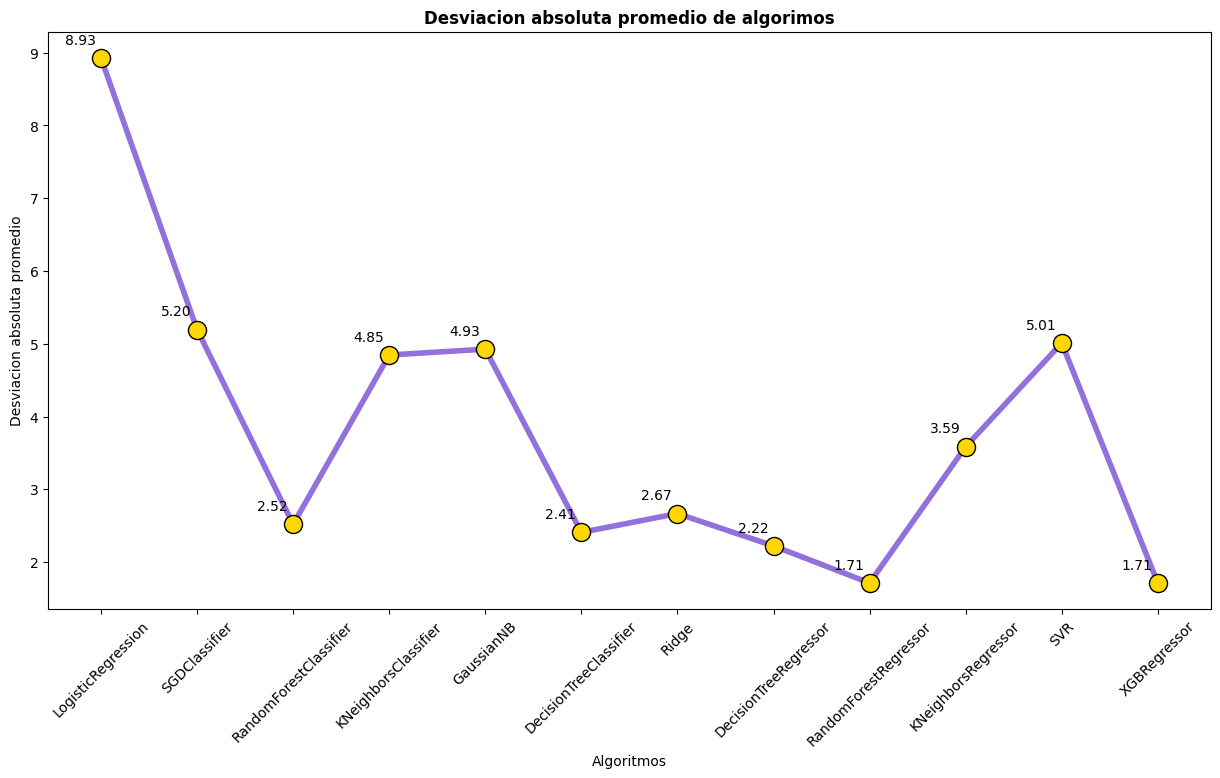

In [32]:
grafica(m1)

Se puede observar que por mucho la regresion logistica es la peor y se ve como otros metodos de regresion muestran mayor potencial.

# MinMaxScaler

Para cada valor en una caracteristica, MinMaxScaler resta el valor minimo de la caracteristica y luego divide por el rango. El rango es la diferencia entre el valor maximo original y el valor mínimo original. MinMaxScaler preserva la forma de la distribucion original.

In [33]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(xtrain)
X_train_norm = norm.transform(xtrain)
X_test_norm = norm.transform(xtest)

In [34]:
m2, models2 = trainingModels(X_train_norm,X_test_norm)

LogisticRegression : 2.7572815533980584
SGDClassifier : 3.370550161812298
RandomForestClassifier : 2.5173948220064726
KNeighborsClassifier : 5.1205501618122975
GaussianNB : 6.741909385113269
DecisionTreeClassifier : 2.365695792880259
Ridge : 2.666544048081611
DecisionTreeRegressor : 2.2427184466019416
RandomForestRegressor : 1.702900485436893
KNeighborsRegressor : 3.7961974110032366
SVR : 2.6566365963295775
XGBRegressor : 1.7125116114460932


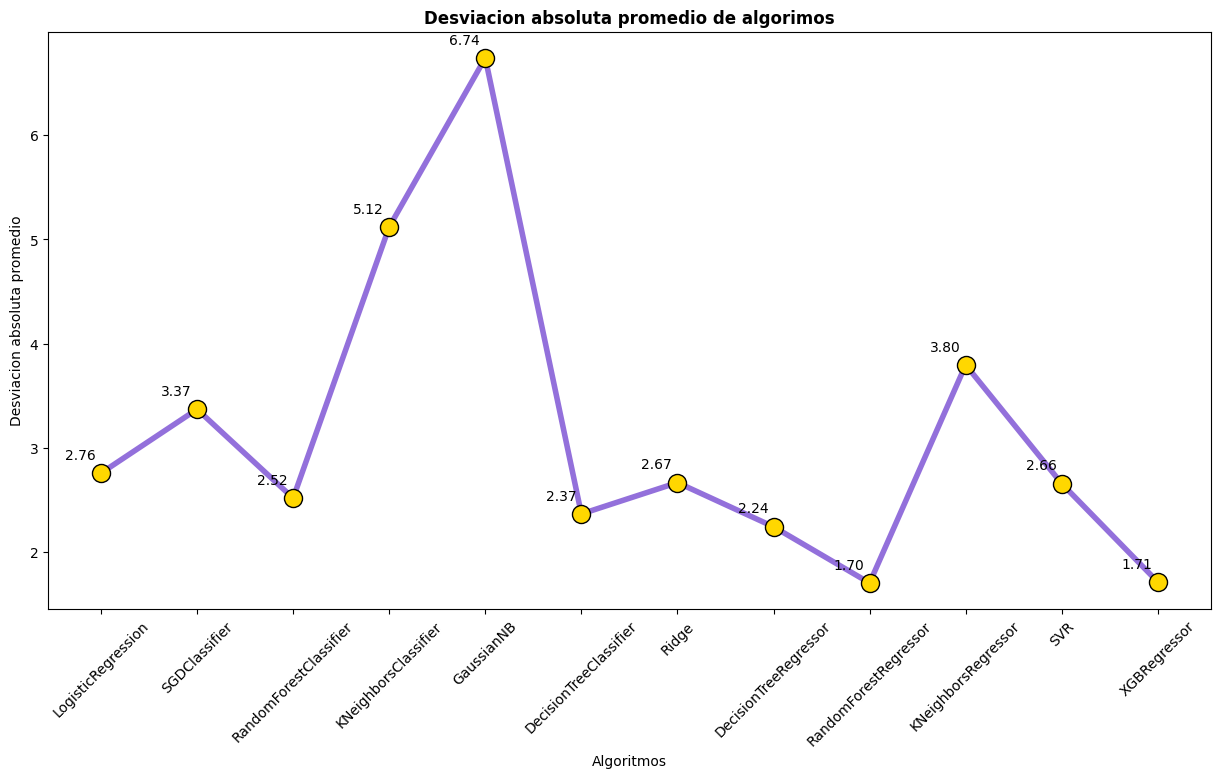

In [35]:
grafica(m2)

Se mejoro bastante usando este metodo de escalado de datos, probaremos otros.

# StandardScaler


StandardScaler elimina la media y escala cada caracteristica o variable a una varianza unitaria. Esta operacion se realiza de forma independiente para cada caracteristica. StandardScaler puede ser influenciado por valores atipicos (si existen en el conjunto de datos) ya que implica la estimacion de la media y desviacion estandar empirica de cada caracteristica.

In [36]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(xtrain)
x_train_std = std.transform(xtrain)
x_test_std = std.transform(xtest)

In [37]:
m3, models3 = trainingModels(x_train_std,x_test_std)

LogisticRegression : 2.808252427184466
SGDClassifier : 3.2382686084142396
RandomForestClassifier : 2.520631067961165
KNeighborsClassifier : 5.606391585760518
GaussianNB : 6.843042071197411
DecisionTreeClassifier : 2.3555825242718447
Ridge : 2.6735212695218515
DecisionTreeRegressor : 2.2803398058252426
RandomForestRegressor : 1.7070388349514565
KNeighborsRegressor : 4.282766990291262
SVR : 3.0512806331693705
XGBRegressor : 1.7125116114460932


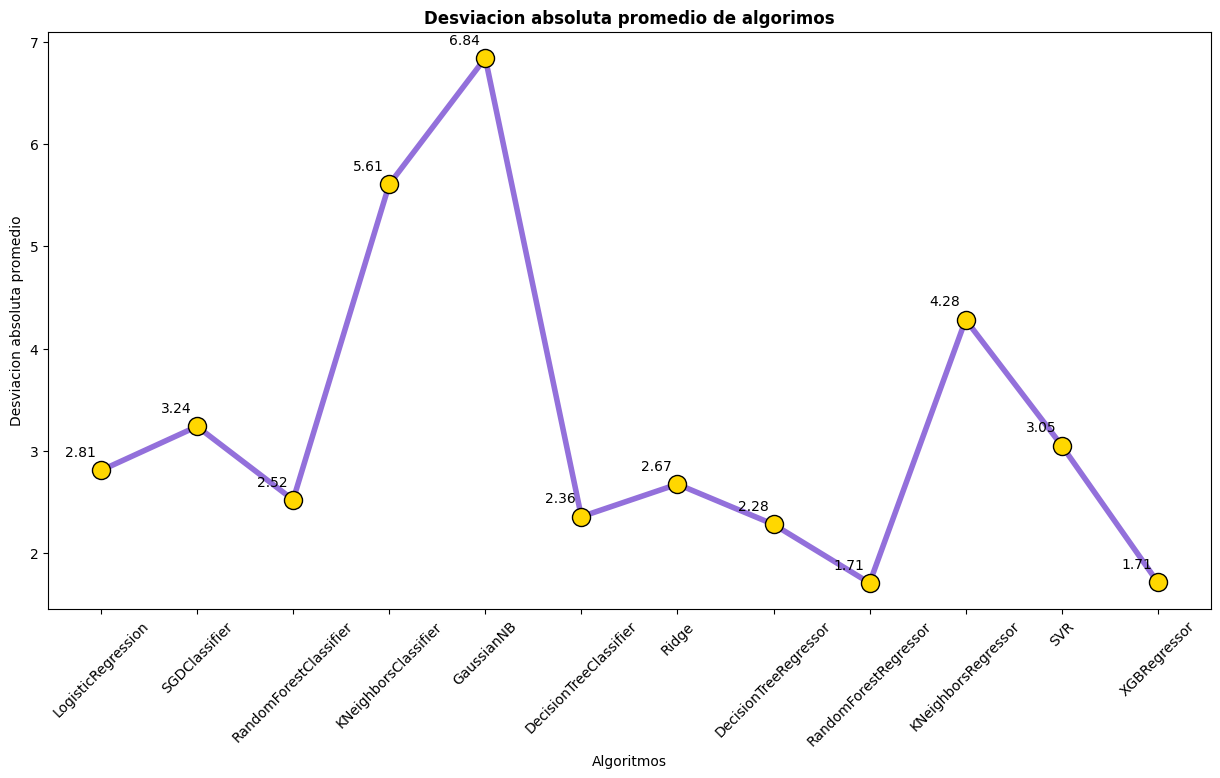

In [38]:
grafica(m3)


# RobustScaler

RobustScaler tiene mejor resitnecia a los fallos por outliers, se encarga de tomar tangos de los cuartiles y remueve la mediana y escala los datos para prevenir estos cambios.

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [40]:
m4, models4 = trainingModels(xtrain_scaled,xtest_scaled)

LogisticRegression : 2.9377022653721685
SGDClassifier : 3.3923948220064726
RandomForestClassifier : 2.5473300970873787
KNeighborsClassifier : 4.183656957928803
GaussianNB : 6.447411003236246
DecisionTreeClassifier : 2.3774271844660193
Ridge : 2.6662610889919316
DecisionTreeRegressor : 2.2050970873786406
RandomForestRegressor : 1.7056512944983822
KNeighborsRegressor : 2.9466019417475726
SVR : 3.1259888962810423
XGBRegressor : 1.7125116114460932


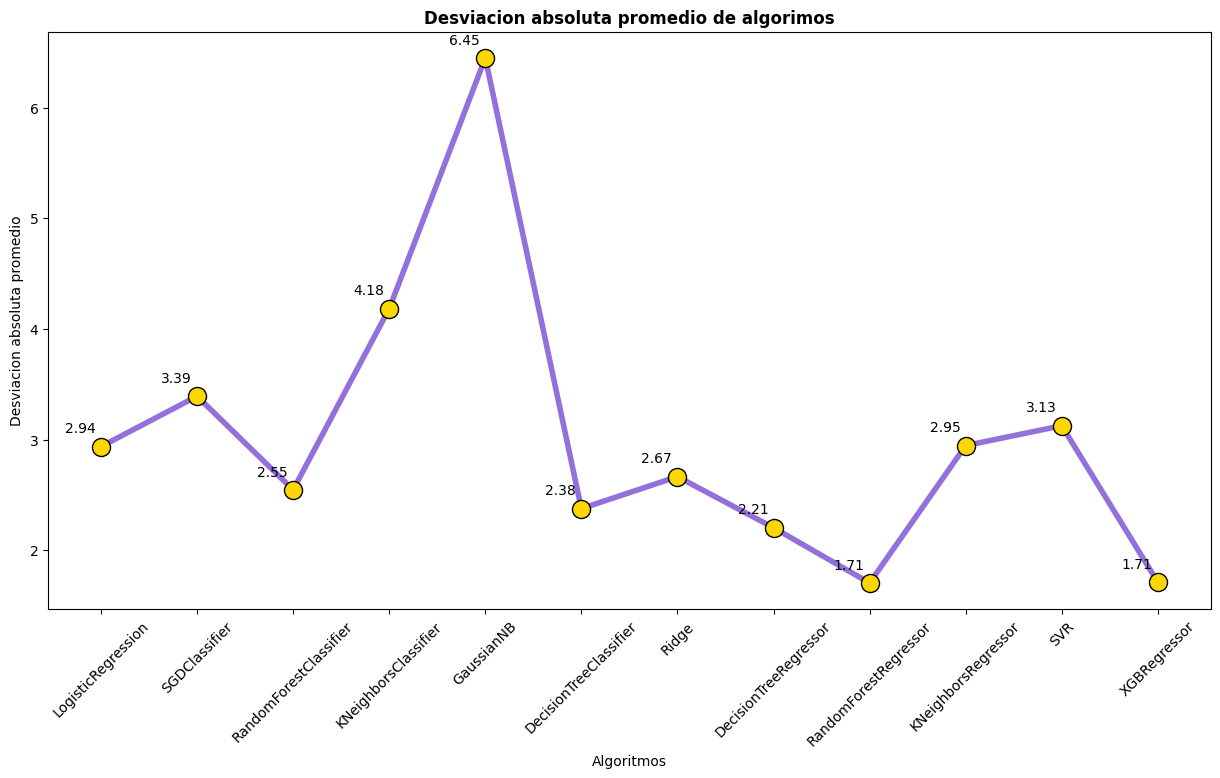

In [41]:
grafica(m4)

Este es el mejor modelo en promedio de todas las veces que se ha ejecutado. XGBoostRegresor y RandomForest Regressor han mostrado ser de los mejores para esta tarea

# Deep learning (Con Sequential)

Intentamos utilizar un metodo de deep learning.

Aqui tambien divido la data con train test split pero con el cambio que intento mantener las carreras enteras o en train o en test.

In [42]:
unique_race_ids = df['raceId'].unique()

race_ids_train, race_ids_test = train_test_split(unique_race_ids, test_size=0.3, random_state=42)

df_encoded = pd.get_dummies(df, columns=['constructorId_x', 'nationality', 'circuitId', 'driverId'], drop_first=True)
train_df = df_encoded[df_encoded['raceId'].isin(race_ids_train)]
test_df = df_encoded[df_encoded['raceId'].isin(race_ids_test)]

x_train = train_df.drop(columns=[
    'positionOrder',  
    'resultId'       
])

y_train = train_df['positionOrder']

x_test = test_df.drop(columns=[
    'positionOrder',  
    'resultId'   
])

y_test = test_df['positionOrder']

# Guardamos las id de las carreras para poder unirlas despues
race_ids_train = x_train['raceId']
race_ids_test = x_test['raceId']


#se eliminan de test y train porque pueden afectar sin ser una variable significativa
x_train = x_train.drop(columns=['raceId'])
x_test = x_test.drop(columns=['raceId'])

# Convertir a arrays de numpy para poder usarlo con tensorflow
X_train = np.array(x_train)
X_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
%%capture
model = Sequential()

# Primera layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))

# layers ocultas
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Salida
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

In [44]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Error absoluto: {test_mae}")

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 2.6907 - mae: 2.6907
Error absoluto: 2.683236837387085


In [45]:
# Deshacer el escalado
X_train_original = scaler.inverse_transform(X_train)
X_test_original = scaler.inverse_transform(X_test)

Aqui hacemos el intento de predecir una carrera entera con el mejor modelo hasta el momento

In [47]:
y_pred = models4['XGBRegressor'].predict(X_test)

original_columns = ['constructorId_y', 'nationality', 'circuitId', 'driverId']
prefixes = [col + '_' for col in original_columns]

results = pd.DataFrame({
    'RaceId': race_ids_test,
    'Race leaderboard': y_test,
    'Predicted': y_pred.flatten()
})

results = results.merge(df, left_on=['RaceId', 'Race leaderboard'], right_on=['raceId', 'positionOrder'], how='inner')[
    ['RaceId', 'driverId', 'Predicted','Race leaderboard']
]

results_sorted = results.sort_values(by='RaceId').reset_index(drop=True)
results_sorted['Calculated Order'] = results_sorted.groupby('RaceId')['Predicted'].rank(ascending=True, method='first').astype(int)

print(results_sorted[results_sorted['RaceId'] == 1128])

      RaceId  driverId  Predicted  Race leaderboard  Calculated Order
2451    1128       858  15.327725                15                13
2452    1128       840  12.919316                14                10
2453    1128       822  12.263575                13                 9
2454    1128         4  15.175007                11                12
2455    1128       848   6.461250                 9                 8
2456    1128         1   2.212977                 7                 2
2457    1128       846   2.788209                 4                 5
2458    1128       847   1.121177                 5                 1
2459    1128       832   2.739714                 3                 4
2460    1128       857   2.934376                 2                 6
2461    1128       844   3.297731                 1                 7
2462    1128       855  14.875414                16                11
2463    1128       830   2.416616                 6                 3
2464    1128       8